<a href="https://colab.research.google.com/github/scorepia/Realtime6005_Project/blob/main/DADS6005_Project_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 KB 10.3 MB/s eta 0:00:00


In [10]:
import json
from kafka import KafkaConsumer
import pandas as pd
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Define function for plotting graph

In [11]:
def graph(dataFrame):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x = dataFrame['Date'], y = dataFrame['Close_Price'], name="Price"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x = dataFrame['Date'], y = dataFrame['Volume'], name="Volume"),
        secondary_y=True,
    )

    # # Add figure title
    # fig.update_layout(
    #     title_text="Double Y Axis Example"
    # )

    # Set x-axis title
    fig.update_xaxes(title_text="Date")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>primary</b> Price", secondary_y=False)
    fig.update_yaxes(title_text="<b>secondary</b> Volume", secondary_y=True)

    fig.show()

> **Producer 1 : PEPSI**

In [6]:
consumer = KafkaConsumer(
    'producer1',
     bootstrap_servers='ec2-13-229-46-113.ap-southeast-1.compute.amazonaws.com:9092',
     value_deserializer=lambda m: json.loads(m.decode('ascii')),
     max_poll_interval_ms=600000
)

pepsi = []
messages = consumer.poll(timeout_ms=600000)
for topic_partition, messages in messages.items():
    for msg in messages:
        print(msg.value)
        json_data = msg.value
        pepsi.append(json_data)

consumer.unsubscribe()
consumer.close()

PEPSI = pd.DataFrame(pepsi)
PEPSI

{'Date': 1642032000000, 'Close_Price': 174.1799926758, 'Volume': 4310300}
{'Date': 1642118400000, 'Close_Price': 175.6399993896, 'Volume': 4474500}
{'Date': 1642464000000, 'Close_Price': 173.9600067139, 'Volume': 5789500}
{'Date': 1642550400000, 'Close_Price': 175.2100067139, 'Volume': 6424500}
{'Date': 1642636800000, 'Close_Price': 173.9400024414, 'Volume': 6284200}
{'Date': 1642723200000, 'Close_Price': 174.2200012207, 'Volume': 6753200}
{'Date': 1642982400000, 'Close_Price': 173.3300018311, 'Volume': 9263900}
{'Date': 1643068800000, 'Close_Price': 171.3399963379, 'Volume': 6536900}
{'Date': 1643155200000, 'Close_Price': 169.5299987793, 'Volume': 6841800}
{'Date': 1643241600000, 'Close_Price': 169.3699951172, 'Volume': 6543500}
{'Date': 1643328000000, 'Close_Price': 172.6699981689, 'Volume': 5796000}
{'Date': 1643587200000, 'Close_Price': 173.5200042725, 'Volume': 5908000}
{'Date': 1643673600000, 'Close_Price': 172.3399963379, 'Volume': 5952700}
{'Date': 1643760000000, 'Close_Price':

,Date,Close_Price,Volume
0,1642032000000,174.179993,4310300
1,1642118400000,175.639999,4474500
2,1642464000000,173.960007,5789500
3,1642550400000,175.210007,6424500
4,1642636800000,173.940002,6284200
...,...,...,...
246,1672963200000,181.100006,3713200
247,1673222400000,179.330002,3319200
248,1673308800000,177.850006,3817300
249,1673395200000,178.050003,4369900


In [7]:
PEPSI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         251 non-null    int64  
 1   Close_Price  251 non-null    float64
 2   Volume       251 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.0 KB


In [8]:
PEPSI['Date'] = pd.to_datetime(PEPSI['Date'], unit='ms')
PEPSI.head()

,Date,Close_Price,Volume
0,2022-01-13,174.179993,4310300
1,2022-01-14,175.639999,4474500
2,2022-01-18,173.960007,5789500
3,2022-01-19,175.210007,6424500
4,2022-01-20,173.940002,6284200


In [31]:
PEPSI.describe()

,Close_Price,Volume
count,251.000000,2.510000e+02
mean,171.914144,5.086489e+06
std,6.946797,1.748149e+06
min,153.729996,1.837000e+06
25%,167.040001,3.921350e+06
50%,171.880005,4.813300e+06
75%,177.260002,5.886000e+06
max,185.899994,1.570810e+07


In [12]:
graph(PEPSI)

In [24]:
PEPSI.corr()

,Close_Price,Volume
Close_Price,1.000000,-0.276873
Volume,-0.276873,1.000000


> **Producer 2 : COCACOLA**

In [14]:
consumer = KafkaConsumer(
    'producer2',
     bootstrap_servers='ec2-13-229-46-113.ap-southeast-1.compute.amazonaws.com:9092',
     value_deserializer=lambda m: json.loads(m.decode('ascii')),
     max_poll_interval_ms=600000
)

cocacola = []
messages = consumer.poll(timeout_ms=600000)
for topic_partition, messages in messages.items():
    for msg in messages:
        print(msg.value)
        json_data = msg.value
        cocacola.append(json_data)

consumer.unsubscribe()
consumer.close()

COCACOLA = pd.DataFrame(cocacola)
COCACOLA

{'Date': 1642032000000, 'Close_Price': 621.7899780273, 'Volume': 47800}
{'Date': 1642118400000, 'Close_Price': 615.5999755859, 'Volume': 20700}
{'Date': 1642464000000, 'Close_Price': 592.0800170898, 'Volume': 27900}
{'Date': 1642550400000, 'Close_Price': 576.549987793, 'Volume': 30000}
{'Date': 1642636800000, 'Close_Price': 577.0300292969, 'Volume': 22800}
{'Date': 1642723200000, 'Close_Price': 575.9899902344, 'Volume': 30700}
{'Date': 1642982400000, 'Close_Price': 600.5100097656, 'Volume': 37500}
{'Date': 1643068800000, 'Close_Price': 598.4000244141, 'Volume': 37000}
{'Date': 1643155200000, 'Close_Price': 584.9199829102, 'Volume': 34200}
{'Date': 1643241600000, 'Close_Price': 566.8499755859, 'Volume': 23200}
{'Date': 1643328000000, 'Close_Price': 576.7100219727, 'Volume': 17100}
{'Date': 1643587200000, 'Close_Price': 573.0, 'Volume': 27700}
{'Date': 1643673600000, 'Close_Price': 566.9600219727, 'Volume': 37700}
{'Date': 1643760000000, 'Close_Price': 563.8099975586, 'Volume': 39700}
{'

,Date,Close_Price,Volume
0,1642032000000,621.789978,47800
1,1642118400000,615.599976,20700
2,1642464000000,592.080017,27900
3,1642550400000,576.549988,30000
4,1642636800000,577.030029,22800
...,...,...,...
246,1672963200000,500.000000,26200
247,1673222400000,490.510010,30100
248,1673308800000,484.209991,33900
249,1673395200000,496.010010,28500


In [15]:
COCACOLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         251 non-null    int64  
 1   Close_Price  251 non-null    float64
 2   Volume       251 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.0 KB


In [16]:
COCACOLA['Date'] = pd.to_datetime(COCACOLA['Date'], unit='ms')
COCACOLA.head()

,Date,Close_Price,Volume
0,2022-01-13,621.789978,47800
1,2022-01-14,615.599976,20700
2,2022-01-18,592.080017,27900
3,2022-01-19,576.549988,30000
4,2022-01-20,577.030029,22800


In [30]:
COCACOLA.describe()

,Close_Price,Volume
count,251.000000,251.000000
mean,503.803426,46563.346614
std,48.423066,63700.532581
min,409.750000,15500.000000
25%,474.144989,31600.000000
50%,496.010010,38100.000000
75%,528.434998,47750.000000
max,635.770020,989600.000000


In [17]:
graph(COCACOLA)

In [25]:
COCACOLA.corr()

,Close_Price,Volume
Close_Price,1.000000,-0.011186
Volume,-0.011186,1.000000


> **Comparing between PEPSI and COCACOLA**

Price

In [19]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = PEPSI['Date'], y = PEPSI['Close_Price'], name="PEPSI"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = COCACOLA['Date'], y = COCACOLA['Close_Price'], name="COCACOLA"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Comparing Price between PEPSI and COCACOLA"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Price", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Volume", secondary_y=True)

fig.show()

In [27]:
Pepsi = PEPSI.rename(columns = {'Close_Price':'Close_Price_PEPSI', 'Volume':'Volumn_PEPSI'})
Cocacola = COCACOLA.rename(columns = {'Close_Price':'Close_Price_COCACOLA', 'Volume':'Volumn_COCACOLA'})

concate = pd.concat([Pepsi, Cocacola], axis=1)
concate


,Date,Close_Price_PEPSI,Volumn_PEPSI,Date,Close_Price_COCACOLA,Volumn_COCACOLA
0,2022-01-13,174.179993,4310300,2022-01-13,621.789978,47800
1,2022-01-14,175.639999,4474500,2022-01-14,615.599976,20700
2,2022-01-18,173.960007,5789500,2022-01-18,592.080017,27900
3,2022-01-19,175.210007,6424500,2022-01-19,576.549988,30000
4,2022-01-20,173.940002,6284200,2022-01-20,577.030029,22800
...,...,...,...,...,...,...
246,2023-01-06,181.100006,3713200,2023-01-06,500.000000,26200
247,2023-01-09,179.330002,3319200,2023-01-09,490.510010,30100
248,2023-01-10,177.850006,3817300,2023-01-10,484.209991,33900
249,2023-01-11,178.050003,4369900,2023-01-11,496.010010,28500


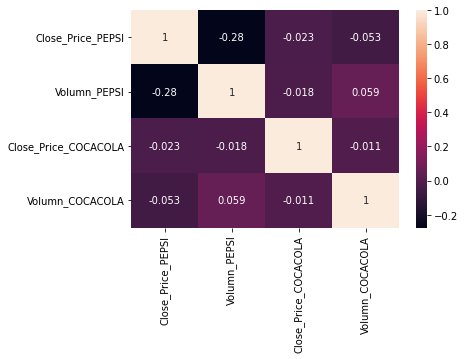

In [29]:
import seaborn as sb
corr = concate.corr()
sb.heatmap(corr, annot=True)

Volume

In [20]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = PEPSI['Date'], y = PEPSI['Volume'], name="PEPSI"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = COCACOLA['Date'], y = COCACOLA['Volume'], name="COCACOLA"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Comparing Volume between PEPSI and COCACOLA"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Price", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Volume", secondary_y=True)

fig.show()

> **Reddit**

In [40]:
consumer = KafkaConsumer(
    'producer3',
     bootstrap_servers='ec2-13-229-46-113.ap-southeast-1.compute.amazonaws.com:9092',
     value_deserializer=lambda m: json.loads(m.decode('ascii')),
     max_poll_interval_ms=600000
)

reddit = []
messages = consumer.poll(timeout_ms=600000)
for topic_partition, messages in messages.items():
    for msg in messages:
        print(msg.value)
        json_data = msg.value
        reddit.append(json_data)

consumer.unsubscribe()
consumer.close()

REDDIT = pd.DataFrame(reddit)
REDDIT

{'name': 'Cocacola', 'Negative ': 50, 'Positive': 32, 'General': 16}
{'name': 'Pepsi', 'Negative ': 56, 'Positive': 36, 'General': 8}


,name,Negative,Positive,General
0,Cocacola,50,32,16
1,Pepsi,56,36,8


In [44]:
REDDIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2 non-null      object
 1   Negative   2 non-null      int64 
 2   Positive   2 non-null      int64 
 3   General    2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [48]:
REDDIT

,name,Negative,Positive,General
0,Cocacola,50,32,16
1,Pepsi,56,36,8


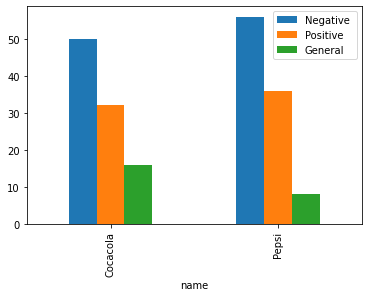

In [49]:
REDDIT.plot(x="name", y=["Negative ", "Positive", "General"], kind="bar")

In [61]:
REDDIT = REDDIT.set_index('name')
REDDIT

,Negative,Positive,General
name,,,
Cocacola,50,32,16
Pepsi,56,36,8


In [62]:
trp_REDDIT = REDDIT.transpose()
trp_REDDIT

name,Cocacola,Pepsi
Negative,50,56
Positive,32,36
General,16,8


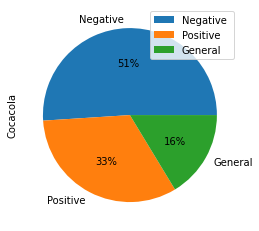

In [65]:
trp_REDDIT.plot(kind='pie', y='Cocacola', autopct='%1.0f%%')

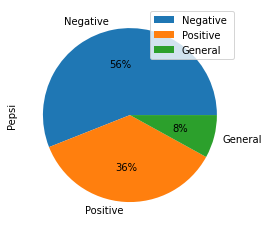

In [66]:
trp_REDDIT.plot(kind='pie', y='Pepsi', autopct='%1.0f%%')